In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

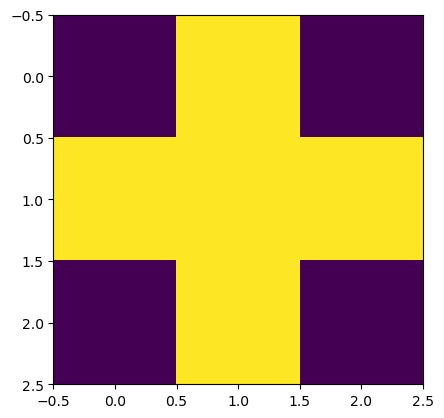

In [2]:
kernel = np.zeros((3, 3), np.uint8)
kernel[0, 0] = kernel[0, 2] = kernel[2, 0] = kernel[2, 2] = 0
kernel[:, 1] = kernel[1, :] = 1
plt.imshow(kernel)

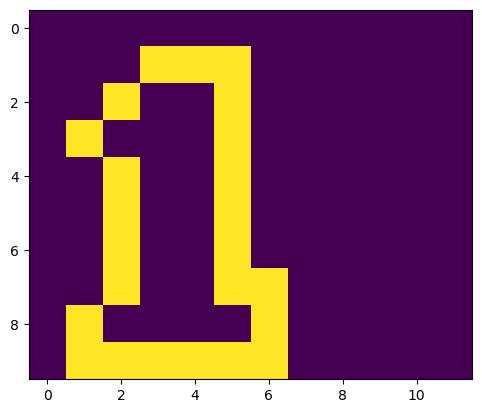

In [3]:
img = np.zeros((10, 12), np.uint8)
img[1, 3:6] = img[1:8, 5] = img[7:10, 6] = img[9, 1:7] = img[8, 1] = img[4:8, 2] = img[2, 2] = img[3, 1] = 1
plt.imshow(img)

In [4]:
def dilate(img, kernel):
    rows, cols = img.shape
    krows, kcols = kernel.shape
    print(krows, kcols)
    pad_rows = krows // 2
    pad_cols = kcols // 2
    
    padded_img = cv.copyMakeBorder(img, pad_rows, pad_rows, pad_cols, pad_cols, cv.BORDER_CONSTANT)
    
    output = np.zeros_like(img)
    
    for i in range (rows):
        for j in range (cols):
            
            roi = padded_img[i:i + krows, j:j + kcols]
            
            result = np.zeros_like(roi)
            h, w = result.shape

            for x in range (h):
                for y in range (w):
                    result[x, y] = roi[x, y] & kernel[x, y]
            
            if np.any(result):
                output[i][j] = 1
    
    return output

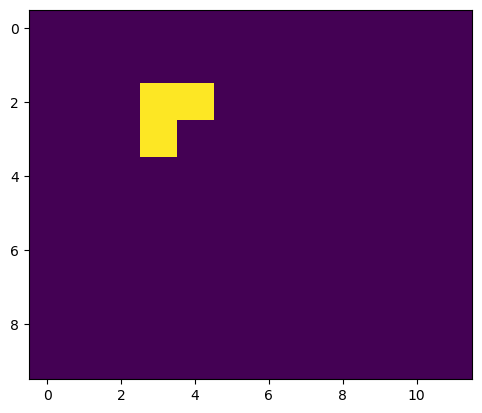

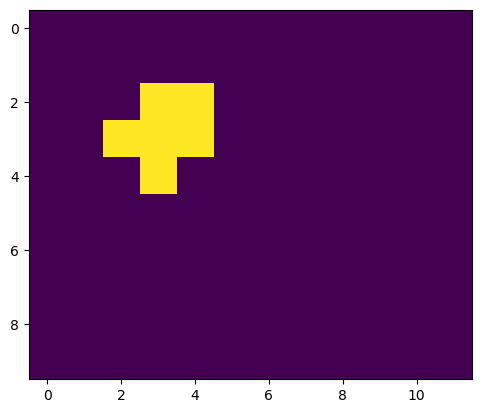

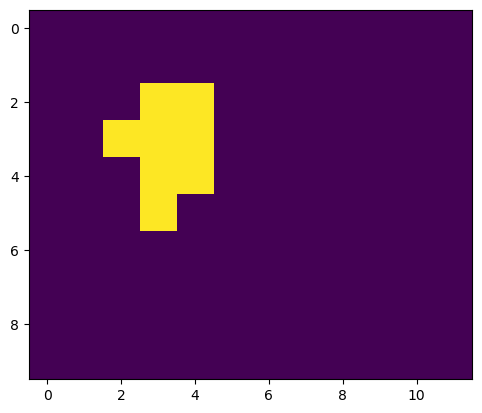

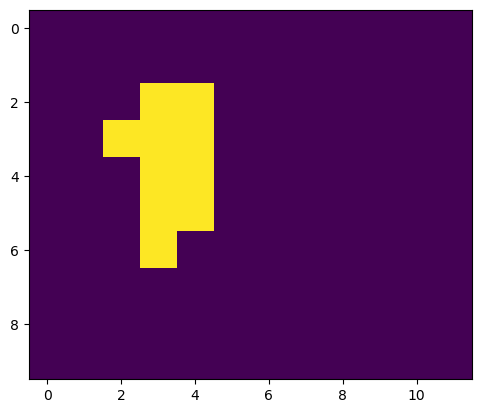

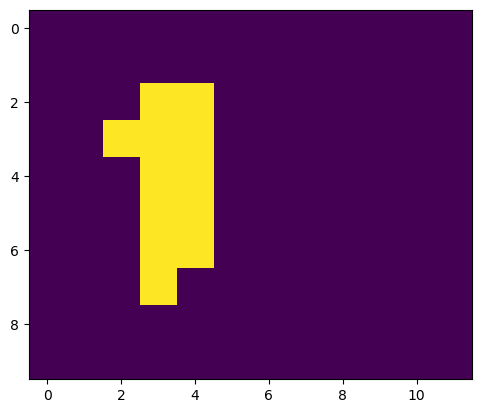

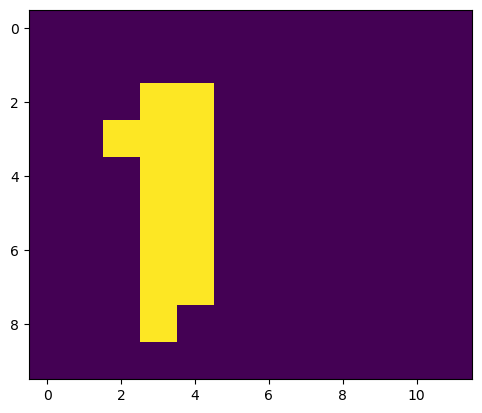

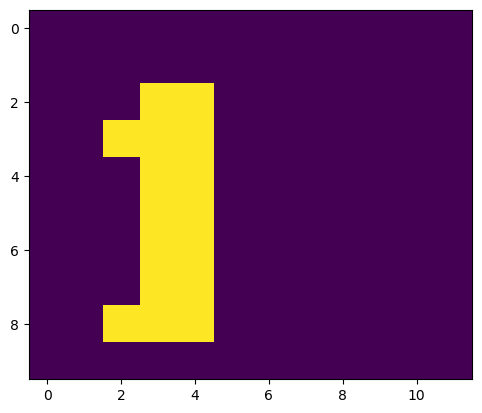

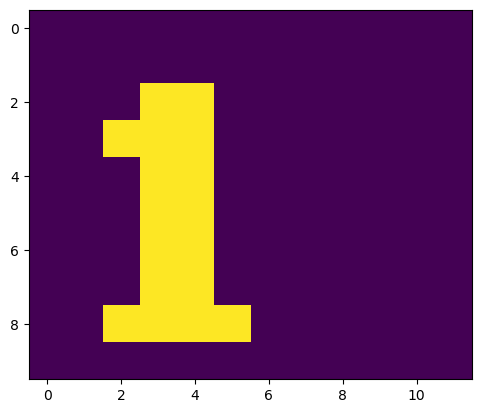

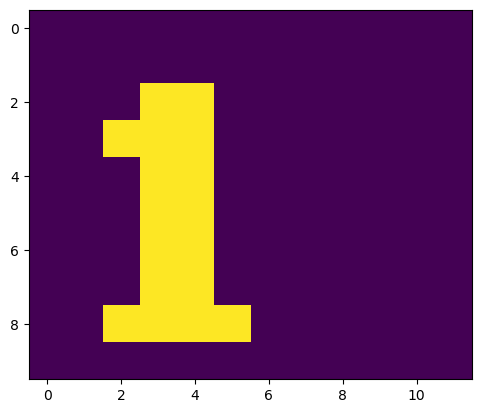

In [5]:
fill = np.zeros_like(img)
fill[2, 3] = 1 # seed co-ordinate
complement = 1 - img # complement of the image

while True:
    prev = fill
    # output = dilate(fill, kernel)
    output = cv.dilate(fill, kernel, iterations=1)
    fill = np.bitwise_and(output, complement)
    plt.imshow(fill)
    plt.show()
    if np.array_equal(fill, prev):
        break

Text(0.5, 1.0, 'Hole Filled')

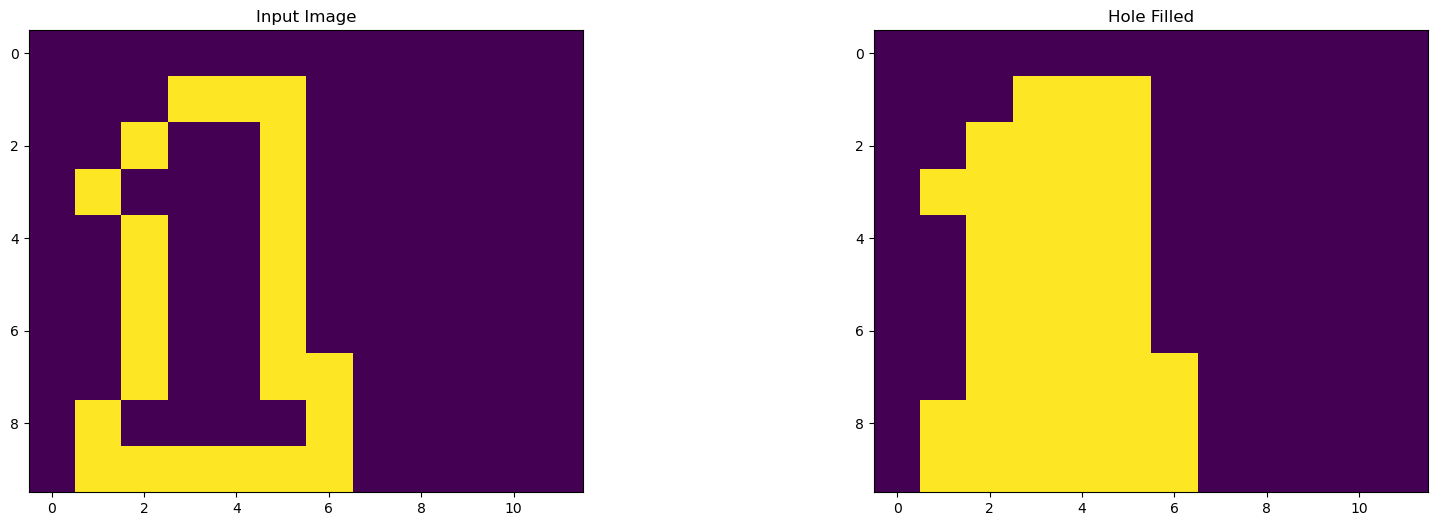

In [6]:
result = np.bitwise_or(img, fill)

figure, axis = plt.subplots(1,2, figsize=(20, 6))
axis[0].imshow(img)
axis[0].set_title("Input Image")

axis[1].imshow(result)
axis[1].set_title("Hole Filled")